# Импортируем библиотеки `"pandas"` (библиотека для обработки и анализа данных), и `"matmlotlib"` (низкоуровневая библиотека для построения графиков на `Python`, которая служит в качестве утилиты визуализации), а именно модуль `.pyplot` (модуль в пакете Matplotlib) .
---

In [13]:
# Импортируем библиотеки pandas и matplotlib с его модулем .pyplot
import pandas as pd
import matplotlib.pyplot as plt

## Снимаем ограничение на количество отображаемых колонок.
---

In [14]:
pd.set_option("display.max_columns", None)

In [15]:
# Загрузка Excel-файла в объект DataFrame.
# Метод pd.read_excel считывает данные из файла Excel (формата .xlsx, .xls) и загружает в таблицу.
df_deposits = pd.read_excel("ds_deposits.xlsx", engine = "openpyxl")

# Отображаем первые 5 строк датафрейма
df_deposits.head()

,REPORT_DATE,CLIENTID,CURRENCY,PRODUCT_OF_DEPOSIT,BALANCE,PREV_BALANCE
0,2023-10-30,3802103218,UZS,% каждый день на Visa,193000000.00,0.00
1,2023-10-30,1325361413,UZS,% каждый день на Visa,53000000.00,0.00
2,2023-10-30,2635323882,UZS,% каждый день на Visa,1225000.00,0.00
3,2023-10-30,3884573406,UZS,% каждый день на Visa,5500000.00,0.00
4,2023-10-30,3578059363,UZS,% каждый день на Visa,4000000.00,0.00


In [16]:
# Отображаем последние 5 строк датафрейма
df_deposits.tail()

,REPORT_DATE,CLIENTID,CURRENCY,PRODUCT_OF_DEPOSIT,BALANCE,PREV_BALANCE
26060,2023-10-31,3035877158,UZS,% каждый день на Visa,343104676.00,342898371.00
26061,2023-10-31,4078421678,UZS,% каждый день на Visa,72864704.01,70469219.01
26062,2023-10-31,2957559643,UZS,% каждый день на счет,1005781.00,1005204.00
26063,2023-10-31,4164667437,UZS,% каждый день на Visa,76600320.00,78000320.00
26064,2023-10-31,3855151691,UZS,% каждый день на Visa,13843925.00,13963925.00


# Перед анализом данных, очень важно выполнить этап предварительной обработки и очистки данных **(data cleaning & preprocessing)**. Это фундаментальный шаг, обеспечивающий корректность последующего анализа и визуализации.
---

## Универсальный чек-лист для анализа данных. ✅ -означает: этот шаг нужен для исполнения  ❌ - означает: этот шаг ненужен для исполнения:
| Шаг | Действие | Примечание |
| ----------- | ----------- | ----------- |
| 1. Загрузка данных. | Загрузить данные и предварительно просмотреть структуру (`head()`, `info()`). | ✅ Убедитесь, что данные корректно считались. |
| 2. Очистка названий столбцов. | Удалить лишние пробелы, привести к единому стилю (`snake_case`, `lowercase`). | ❌ Например: `Product Name → product_name`. |
| 3. Проверка и удаление дубликатов. | Удалить повторяющиеся строки, если они не несут ценности. | ❌`df.drop_duplicates()` |
| 4. Обработка пропусков `(NaN)`. | Определить долю пропущенных значений и решить: удалить или заменить. | ✅ Используйте `isna().sum()` и визуализацию (например, `missingno`). |
| 5. Приведение типов данных. | Убедиться, что числовые, категориальные и временные переменные имеют правильные типы (`int`, `float`, `category`, `datetime`). | ❌ Ошибки типов — частая причина искажения анализа. |
| 6. Обработка строковых колонок. | Удалить лишние пробелы, привести к одному регистру, унифицировать формат. | ❌ Например: " USA " → "usa" |
| 7. Обработка категориальных признаков. | Проверить уникальные значения, унифицировать категории, заменить пропуски. | ❌ Например: "M", "Male", "male" → "Male" |
| 8. Обработка числовых колонок. | Заменить пропуски на медиану/среднее/0. Проверить на выбросы и отрицательные значения (если не допустимы). | ❌ Визуализируйте с `boxplot`, `histogram`. |
| 9. Работа с датами. | Преобразовать в `datetime`, выделить год, месяц и т.п. | ❌ `pd.to_datetime()` и `df['date'].dt.year` |
| 10. Добавление новых переменных. | При необходимости — создать расчетные поля (например, `total`, `duration`, `is_weekend`). | ❌ Это улучшит качество анализа. |
| 11. Проверка на логику и ошибки. | Убедиться, что данные согласованы: например, `start_date <= end_date`. | ❌ Важно для временных и количественных данных. |
| 12. Сохранение очищенных данных. | Сохранить подготовленный файл в новый `CSV/Excel`. | ❌ Чтобы не терять прогресс очистки. |
---

In [17]:
# Отображаем первые 5 строк датафрейма
df_deposits.head()

,REPORT_DATE,CLIENTID,CURRENCY,PRODUCT_OF_DEPOSIT,BALANCE,PREV_BALANCE
0,2023-10-30,3802103218,UZS,% каждый день на Visa,193000000.00,0.00
1,2023-10-30,1325361413,UZS,% каждый день на Visa,53000000.00,0.00
2,2023-10-30,2635323882,UZS,% каждый день на Visa,1225000.00,0.00
3,2023-10-30,3884573406,UZS,% каждый день на Visa,5500000.00,0.00
4,2023-10-30,3578059363,UZS,% каждый день на Visa,4000000.00,0.00


In [18]:
# Отображаем последние 5 строк датафрейма
df_deposits.tail()

,REPORT_DATE,CLIENTID,CURRENCY,PRODUCT_OF_DEPOSIT,BALANCE,PREV_BALANCE
26060,2023-10-31,3035877158,UZS,% каждый день на Visa,343104676.00,342898371.00
26061,2023-10-31,4078421678,UZS,% каждый день на Visa,72864704.01,70469219.01
26062,2023-10-31,2957559643,UZS,% каждый день на счет,1005781.00,1005204.00
26063,2023-10-31,4164667437,UZS,% каждый день на Visa,76600320.00,78000320.00
26064,2023-10-31,3855151691,UZS,% каждый день на Visa,13843925.00,13963925.00


In [19]:
# Функция info() показывает информацию о DataFrame
# Включая типы данных и использование памяти
# memory_usage = "deep" позволяет получить более точную информацию о потреблении памяти
# Важно отметить, что использование memory_usage = "deep" может занять больше времени, так как оно требует дополнительного анализа
df_deposits.info(memory_usage = "deep")

# Все данные имеют соответствующие типы. Приведение данных не требуется.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26065 entries, 0 to 26064
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   REPORT_DATE         26065 non-null  datetime64[ns]
 1   CLIENTID            26065 non-null  int64         
 2   CURRENCY            26065 non-null  object        
 3   PRODUCT_OF_DEPOSIT  26065 non-null  object        
 4   BALANCE             26065 non-null  float64       
 5   PREV_BALANCE        26065 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 4.7 MB


## `missingno` — это библиотека `Python`, предоставляющая инструменты для визуализации и понимания отсутствующих данных в наборах данных.
---

In [ ]:
!pip install missingno
import missingno as msno

REPORT_DATE           0
CLIENTID              0
CURRENCY              0
PRODUCT_OF_DEPOSIT    0
BALANCE               0
PREV_BALANCE          0
dtype: int64


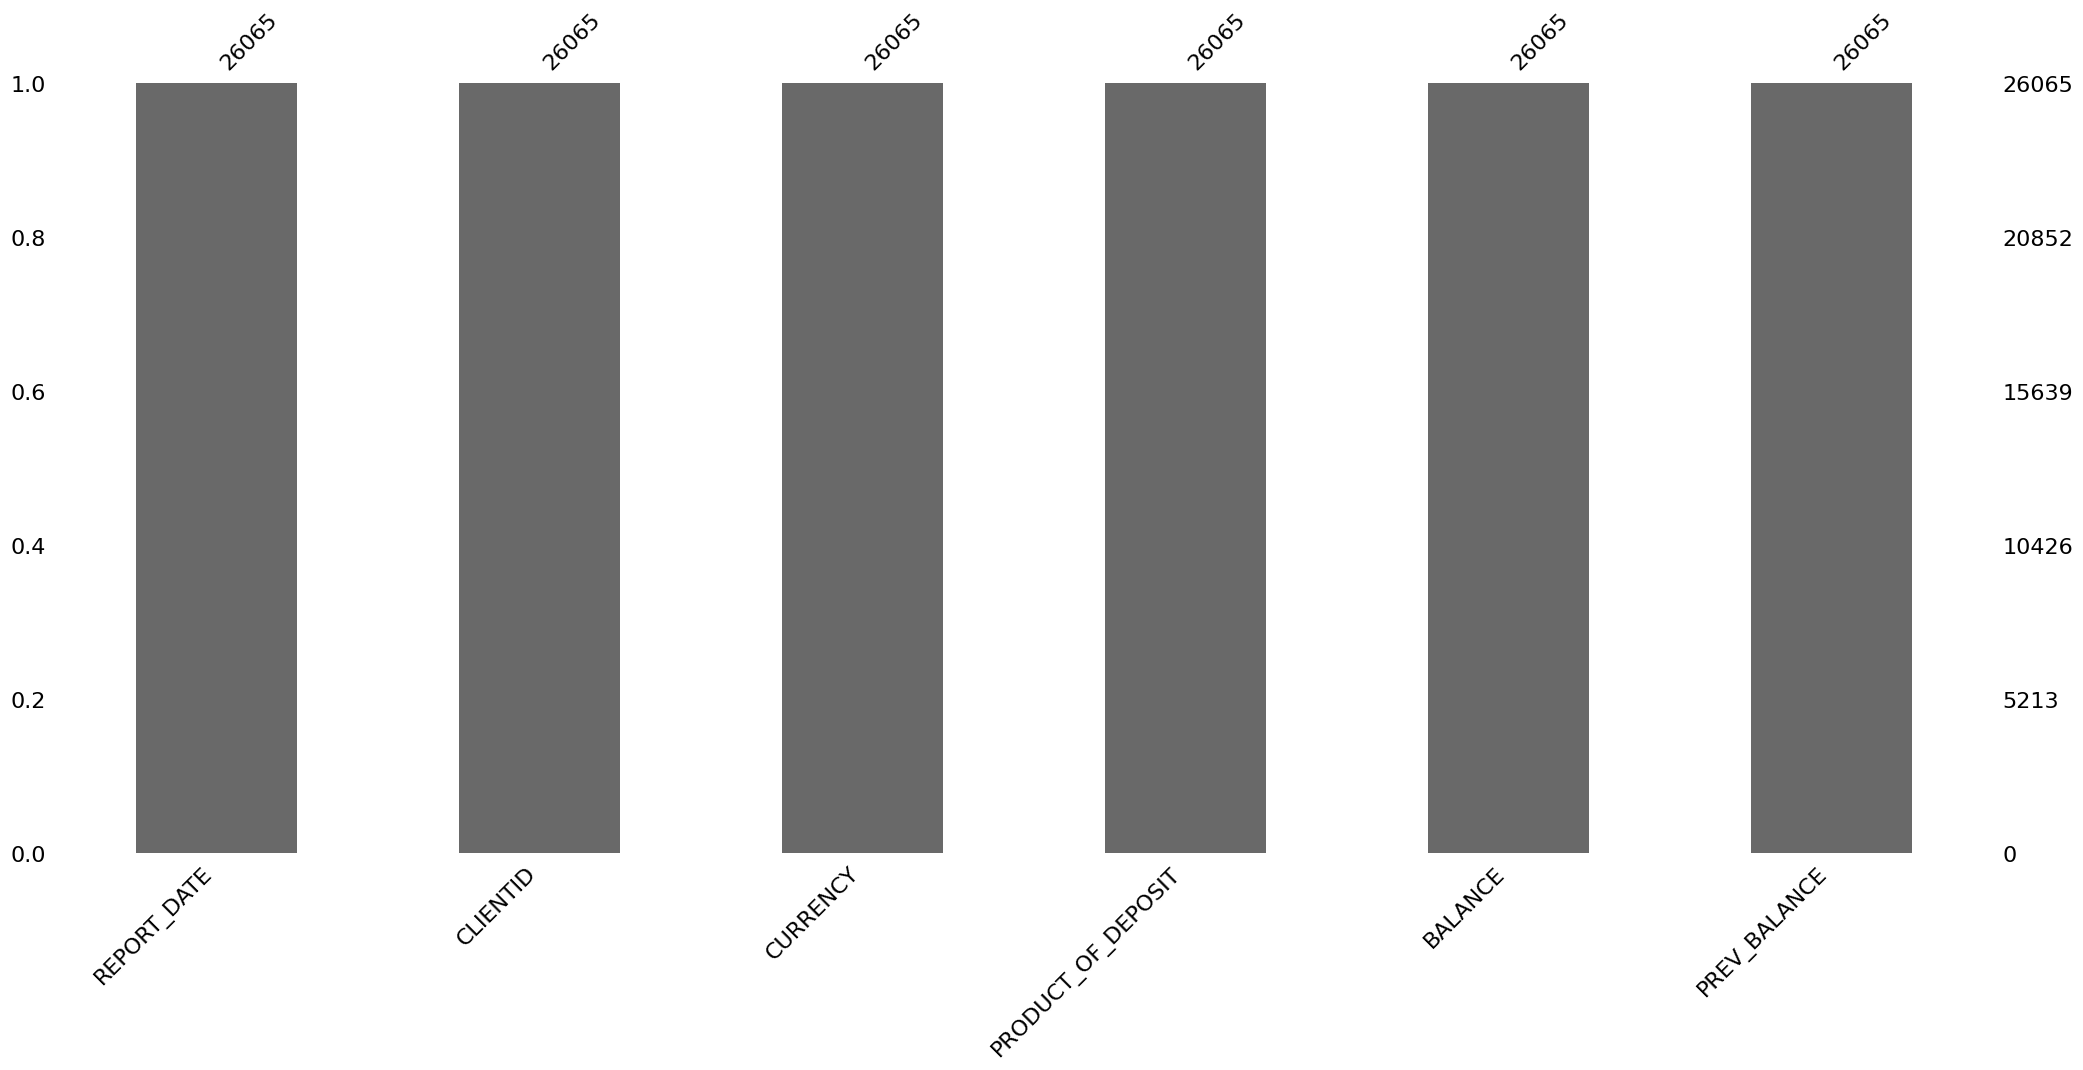

In [21]:
# Подсчитываем общую сумму всех пропущенных значений в каждом столбце
print(df_deposits.isna().sum())

# Визуализируем пропущенные значения в виде гистограммы (bar chart), если есть
msno.bar(df_deposits)
plt.show()

# В статическом и визуальном формате, все данные заполнены. Дальнейших манипуляций не требуется.

## **Задание 1: Анализ депозитов по продуктам**
## **ЗАДАЧА**:
### Найди средний, медианный и модальный остаток на депозитах для каждого продукта депозита.
## **ИНСТРУКЦИЯ**:
### 1. Сгруппируй данные по столбцу `PRODUCT_OF_DEPOSIT`
### 2. Для каждой группы вычисли средний, медианный и модальный остаток на депозитах.
---

In [25]:
# Убираем научную (scientific) нотацию в выводе чисел в pandas глобально
pd.set_option('display.float_format', '{:.2f}'.format)

# Функция python для вычисления mode
def calculate_mode(series):
    """
    Функция для вычисления модального (самого часто встречающегося) значения в серии.
    
    Параметры:
        series (pd.Series): Входная серия (например, BALANCE по каждому продукту).
        
    Возвращает:
        Значение моды (если оно существует), иначе None.
    """
    mode_series = series.mode() # Вычисляем моду. Это может быть несколько значений.

    if not mode_series.empty:
        return mode_series.iloc[0] # Возвращаем первое модальное значение
    else:
        return None # Если мода не найдена (например, все значения — NaN)

# Группировка и расчёт среднего, медианы и моды
df_grouped = (
    df_deposits
    .groupby("PRODUCT_OF_DEPOSIT")["BALANCE"]
    .agg([
        ("mean_balance", "mean"),        # Находим mean и именуем колонку
        ("median_balance", "median"),    # Находим median и именуем колонку
        ("mode_balance", calculate_mode) # Находим mode и именуем колонку.
    ])
).reset_index()

# Выводим результат
df_grouped

,PRODUCT_OF_DEPOSIT,mean_balance,median_balance,mode_balance
0,% ежемесячно на Visa,1028337202.56,40500000.00,0.00
1,% ежемесячно на счет,61798926.97,13488000.00,0.00
2,% каждый день на Visa,587732728.02,37121305.27,1000000.00
3,% каждый день на счет,588411889.04,20000000.00,0.00
4,Большой депозит,35178.74,10000.00,0.00
5,Депозит копилка,92789422.02,32000000.00,0.00
6,Люкс депозит,123741.61,10308.00,1003.00
7,Сбережения,0.00,0.00,0.00


## **Задание 2: Оценка риска на основе стандартного отклонения**
## **ЗАДАЧА**:
### Определи, какой продукт депозита имеет наибольший риск по стандартному отклонению остатков на депозитах. Оцени, какие продукты имеют наиболее стабильные остатки.
## **ИНСТРУКЦИЯ**:
### 1. Сгруппируй данные по продуктам депозита.
### 2. Для каждой группы вычисли стандартное отклонение остатков на депозитах.
### 3. Определи продукты с наибольшим и наименьшим стандартным отклонением.

In [52]:
std_risk = (
    df_deposits
    # Группируем данные по типу депозитного продукта. 
    # Каждая группа будет содержать все строки, относящиеся к одному продукту.
    .groupby("PRODUCT_OF_DEPOSIT")["BALANCE"]
    .std() # Вычисляем стандартное отклонение остатков по каждой группе
    .reset_index(name = "std_balance") # Сбрасываем индекс и переименовываем его для читаемости
    .sort_values(by = "std_balance", ascending = False) # Сортируем значения по возростанию
)

"""
.std() - Это и есть показатель волатильности / риска:

Большое отклонение → остатки сильно колеблются → высокий риск

Малое отклонение → остатки стабильны → низкий риск

Стандартное отклонение (std) рассчитывается только если есть ≥ 2 значения.

Если в группе только одно значение, std() возвращает NaN. 
Поэтому при выводе значений, значение колонки "Сбережения" = NaN
"""

std_risk.reset_index(drop = True)

,PRODUCT_OF_DEPOSIT,std_balance
0,% каждый день на счет,8759389121.72
1,% каждый день на Visa,8075634436.04
2,% ежемесячно на Visa,6673548555.14
3,Депозит копилка,263689747.87
4,% ежемесячно на счет,150791226.35
5,Люкс депозит,436918.02
6,Большой депозит,140238.34
7,Сбережения,NaN


## **Задание 3: Сравнение остатка по валютам**
## **ЗАДАЧА:**
### Сравни распределение остатков на депозитах для различных валют. Определи, в какой валюте депозиты имеют наибольшую медиану и наименьший разброс.
## **ИНСТРУКЦИЯ:**
### 1. Сгруппируй данные по столбцу `CURRENCY`.
### 2. Для каждой валюты вычисли медианный остаток на депозите и стандартное отклонение.
### 3. Определи валюту с наибольшей медианой и наименьшим стандартным отклонением.

In [ ]:
# Сгруппируй данные по столбцу `CURRENCY`.
# Для каждой валюты вычисли медианный остаток на депозите и стандартное отклонение.
df_currencies = (
    df_deposits
    .groupby("CURRENCY")["BALANCE"]
    .agg(median_balance = "median", std_balance = "std")
    .reset_index()
)

df_currencies

,CURRENCY,median_balance,std_balance
0,EUR,10308.00,436918.02
1,USD,10000.00,140238.34
2,UZS,32272585.00,7716735131.82


In [ ]:
# Найти валюту с наибольшей медианой:
highest_median_currency = (
    df_currencies
    .sort_values(by = "median_balance", ascending = False)
    .iloc[0]
)

# Найти валюту с наименьшим стандартным отклонением:
lowest_std_currency = (
    df_currencies
    .sort_values(by = "std_balance", ascending = True)
    .iloc[0]
)

# Преобразуем Series в строку DataFrame
highest_df = pd.DataFrame([highest_median_currency])
lowest_df = pd.DataFrame([lowest_std_currency])

print("Валюта с наибольшей медианой остатков:")
display(highest_df)

print("Валюта с наименьшим разбросом остатков:")
display(lowest_df)

Валюта с наибольшей медианой остатков:


,CURRENCY,median_balance,std_balance
2,UZS,32272585.00,7716735131.82


 Валюта с наименьшим разбросом остатков:


,CURRENCY,median_balance,std_balance
1,USD,10000.00,140238.34
